In [1]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(x))

def numerical_derivative(f, x):
    dx = 1e-4
    gradf = np.zeros_like(x)
    
    it = np.nditer(x, flags = ['multi_index'],
                                    op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float((tmp_val)+dx)
        fx1 = f(x)
        
        x[idx] = float((tmp_val)-dx)
        fx2 = f(x)
        gradf[idx] = (fx1-fx2)/(2*dx)
        
        x[idx] = tmp_val
        it.iternext()
    return gradf
    

In [2]:
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 120.0 kB/s eta 0:00:00m eta 0:00:010:00:04


In [4]:
class logicGate:
    def __init__(self, gate_name, xdata, tdata, learning_rate=0.01, threshold=0.5):
        self.name = gate_name
        
        self.__xdata=xdata.reshape(4,2)
        self.__tdata=tdata.reshape(4,1)
        
        self.__w=np.random.rand(2,1)
        self.__b=np.random.rand(1)
        
        self.__learning_rate = learning_rate
        self.__threshold = threshold

    def __loss_func(self):
        delta = 1e-7
        
        z = np.dot(self.__xdata, self.__w) + self.__b
        y = sigmoid(z)
        
        return -np.sum(self.__tdata*np.log(y+delta) + (1-self.__tdata)*np.log((1-y)+delta))

    def err_val(self):
        delta = 1e-7

        z = np.dot(self.__xdata, self.__w)+self.__b
        y = sigmoid(z)
        return -np.sum(self.__tdata + np.log(y+delta) + (1-self.__tdata)*np.log((1-y)+delta))

    def train(self):
        f = lambda x : self.__loss_func()
        print("init error : ", self.err_val())

        for stp in range(20000):
            self.__w -= self.__learning_rate * numerical_derivative(f, self.__w)
            self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)
            if (stp % 2000 == 0):
                print("step : ", stp, "error : ", self.err_val(), f)

    def predict(self, input_data):
        z = np.dot(input_data, self.__w) + self.__b
        y = sigmoid(z)

        if y[0] > self.__threshold:
            result = 1
        else:
            result = 0
        return y, result

In [5]:
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[0,0,0,1]])

AND = logicGate("AND", xdata, tdata)
AND.train()
for in_data in xdata:
    (sig_val, logic_val) = AND.predict(in_data)
    print(in_data , " : ", logic_val)

xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[0,1,1,1]])

OR = logicGate("OR", xdata, tdata)
OR.train()
for in_data in xdata:
    (sig_val, logic_val) = OR.predict(in_data)
    print(in_data , " : ", logic_val)

init error :  5.296641257213147
step :  0 error :  5.286673341397698 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  2000 error :  7.432830881791962 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  4000 error :  9.7759920058826 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  6000 error :  11.429167508037494 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  8000 error :  12.696487206173535 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  10000 error :  13.720437165276595 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  12000 error :  14.577739103060805 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  14000 error :  15.314107550896937 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  16000 error :  15.95885843985174 <function logicGate.train.<locals>.<lambda> at 0x7f8118557910>
step :  18000 error :  16.53186324151

2024-05-29 14:43:48.049173: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 14:43:48.049601: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 14:43:48.052260: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 14:43:48.087371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 14:43:48.599822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


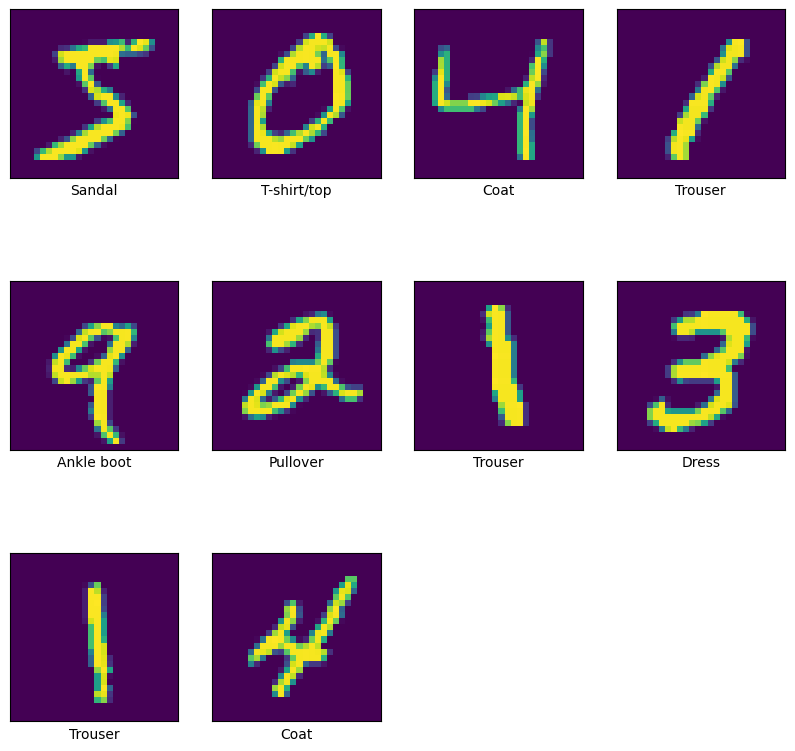

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist

(f_image_train, f_label_train), (f_image_test, f_label_test) = mnist.load_data()

f_image_train, f_image_test = f_image_train/255.0, f_image_test/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize =(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    plt.xlabel(class_names[f_label_train[i]])
plt.show()